In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import seaborn as sns
import random
import os 

In [2]:
class GridWorld(object):
    def __init__(self, m = 20, n = 20, foodNumber = 8, agentsNumber = 4):
        self.m = m
        self.n = n
        self.foodNumber = foodNumber
        self.agentsNumber = agentsNumber
        
        self.grid = np.zeros((m, n))
        self.foodLocation = np.random.randint(20, size=(foodNumber, 2))
        self.setFoodsLoc(self.foodLocation)
        # self.setFoods(foodNumber)
        self.agentAttribute = {}
        self.agentAttribute = self.setAgents(agentsNumber)
        self.possibleActions = ['up', 'down', 'left', 'right', 'eat', 'attack', 'attacked']


    def setFoodsLoc(self, foodLocation):
        for i in range(len(foodLocation)):
            xPos = foodLocation[i][0]
            yPos = foodLocation[i][1]
            if self.grid[xPos][yPos] == 0:
                self.grid[xPos][yPos] = 10
            else:
                i -=1

    def setFoods(self, foodNumber):
        self.foodNumber = foodNumber
        for i in range(self.foodNumber):
            xPos = np.random.randint(self.m)
            yPos = np.random.randint(self.n)
            if self.grid[xPos][yPos] == 0:
                self.grid[xPos][yPos] = 10
            else:
                i -=1

    def setAgents(self, agentsNumber):
        self.agentsNumber = agentsNumber
        for i in range(agentsNumber):
            xPos = np.random.randint(self.m)
            yPos = np.random.randint(self.n)
            if self.grid[xPos][yPos] == 0:
                self.grid[xPos][yPos] = 1 + i
                self.agentAttribute[i]={'xPos': xPos, 'yPos': yPos, 'reward': 0}
            else:
                i -=1
        return self.agentAttribute

    def step(self , action, agentID):
        # 'attack':2, 'attacked':-4
        reward_dict = {'up':-1, 'down':-1, 'left':-1, 'right':-1, 'eat':1, 'attack':2, 'attacked':-4, 'wrong attack':-1}
        
        if action == "up" and self.agentAttribute[agentID]['yPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos'] - 1] == 0:
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = 0
            self.agentAttribute[agentID]['yPos'] -= 1
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = agentID + 1
            # print("agent ", agn," goes up")
            return self.agentAttribute, reward_dict['up'], self.status(self.agentAttribute) , None
        elif action == "down" and self.agentAttribute[agentID]['yPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos'] + 1] == 0:
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = 0
            self.agentAttribute[agentID]['yPos'] += 1
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = agentID + 1
            # print("agent ", agn," goes down")
            return self.agentAttribute, reward_dict['down'], self.status(self.agentAttribute) , None
        elif action == "right" and self.agentAttribute[agentID]['xPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos'] + 1][self.agentAttribute[agentID]['yPos']] == 0:
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = 0
            self.agentAttribute[agentID]['xPos'] += 1
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = agentID + 1
            # print("agent ", agn," goes right")
            return self.agentAttribute, reward_dict['right'], self.status(self.agentAttribute) , None
        elif action == "left" and self.agentAttribute[agentID]['xPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos'] - 1][self.agentAttribute[agentID]['yPos']] == 0:
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = 0
            self.agentAttribute[agentID]['xPos'] -= 1
            self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos']] = agentID + 1
            # print("agent ", agn," goes left")
            return self.agentAttribute, reward_dict['left'], self.status(self.agentAttribute) , None
        elif action == "eat":
            # print("agent ", agn," in eat action", self.agentAttribute[agentID], "\t Grid status", self.grid[self.agentAttribute[agentID]['xPos'] - 1][self.agentAttribute[agentID]['yPos']])
            if self.agentAttribute[agentID]['xPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos'] - 1][self.agentAttribute[agentID]['yPos']] == 10:
                # print("agent ", agn," in eated in # 1 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['xPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos'] + 1][self.agentAttribute[agentID]['yPos']] == 10:
                # print("agent ", agn," in eated in # 2 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['yPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos'] - 1] == 10:
                # print("agent ", agn," in eated in # 3 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['yPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos']][self.agentAttribute[agentID]['yPos'] + 1] == 10:
                # print("agent ", agn," in eated in # 4 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['xPos'] - 1 > -1 and self.agentAttribute[agentID]['yPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos'] - 1 ][self.agentAttribute[agentID]['yPos'] - 1] == 10:
                # print("agent ", agn," in eated in # 5 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['xPos'] - 1 > -1 and self.agentAttribute[agentID]['yPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos'] - 1 ][self.agentAttribute[agentID]['yPos'] + 1] == 10:
                # print("agent ", agn," in eated in # 6 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['xPos'] + 1 < 20 and self.agentAttribute[agentID]['yPos'] - 1 > -1 and self.grid[self.agentAttribute[agentID]['xPos'] + 1 ][self.agentAttribute[agentID]['yPos'] - 1] == 10:
                # print("agent ", agn," in eated in # 7 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            elif self.agentAttribute[agentID]['xPos'] + 1 < 20 and self.agentAttribute[agentID]['yPos'] + 1 < 20 and self.grid[self.agentAttribute[agentID]['xPos'] + 1 ][self.agentAttribute[agentID]['yPos'] + 1] == 10:
                # print("agent ", agn," in eated in # 8 !!!!", self.agentAttribute[agentID])
                return self.agentAttribute, reward_dict['eat'], self.status(self.agentAttribute) , None
            else:
                # print("agent ", agn," in take another action !!!!")
                action = env.actionSpaceSample()
                return self.step(action, agentID)

        elif action == "attack":
            for i in range(len(self.agentAttribute)):
                if i == agentID:
                    continue
                if -2 < self.agentAttribute[agentID]['xPos'] - self.agentAttribute[i]['xPos'] and self.agentAttribute[agentID]['xPos'] - self.agentAttribute[i]['xPos'] < 2:
                    if -2 < self.agentAttribute[agentID]['yPos'] - self.agentAttribute[i]['yPos'] and self.agentAttribute[agentID]['yPos'] - self.agentAttribute[i]['yPos'] < 2:
                        # self.agentAttribute[i]['reward'] += reward_dict['attacked']
                        # print("agent: ", agn," Attacked agent: ",i , "!!!!", self.agentAttribute[agentID], self.agentAttribute[i])
                        return self.agentAttribute, reward_dict['attack'], self.status(self.agentAttribute) , {'action':'Attack','agentID': i,'reward': reward_dict['attacked']}
            return self.agentAttribute, reward_dict['wrong attack'], self.status(self.agentAttribute) , None
        else:
            action = env.actionSpaceSample()
            return self.step(action, agentID)

    def status(self, agentAttribute):
        self.agentAttribute = agentAttribute
        if len(self.agentAttribute) < 2:
            return True
        else:
            return False

    def reset(self):
        self.grid = np.zeros((self.m, self.n))
        self.setFoodsLoc(self.foodLocation)
        self.agentAttribute = self.setAgents(self.agentsNumber)
        return self.agentAttribute

    def render(self):
        print('\n\n')
        for row in self.grid:
            for col in row:
                if col == 0:
                    print('-', end='  ')
                elif col == 10:
                    print('F', end='  ')
                elif col == 1:
                    print('X1', end='  ')
                elif col == 2:
                    print('X2', end='  ')
                elif col == 3:
                    print('X3', end='  ')
                elif col == 4:
                    print('X4', end='  ')
            print('\n')
        print('\n\n')

    def actionSpaceSample(self):
        return np.random.choice(self.possibleActions)



In [3]:
def maxAction(Q, agentID, r, c, actions):
    values = np.array([Q[agentID, r, c, a] for a in actions])
    action = np.argmax(values)
    return actions[action]

def eval(env, Q):
    done = False
    episodeReward = [0 for i in range(agentsNumber)]
    agentAttr = env.reset()
    doneCounter = 0
    while not done:
        doneCounter += 1
        for agn in agentAttr:
            rand = np.random.random()
            if rand < (1-EPS):
                action = maxAction(Q, agn, agentAttr[agn]['xPos'], agentAttr[agn]['yPos'], env.possibleActions)
            else:
                action = env.actionSpaceSample()

            agentAttr_, reward, done, info = env.step(action, agn)
            agentAttr = agentAttr_
            env.render()
            time.sleep(1)
            if doneCounter > 30:
                done = True


In [4]:
row = 20
column = 20
foodNumber = 8
agentsNumber = 4
episodeReward = [0 for i in range(agentsNumber)]
agentlist = [i for i in range(agentsNumber)]
env = GridWorld(row, column, foodNumber, agentsNumber)
ALPHA = 0.1
GAMMA = 1.0
EPS = 1.0

Q = {}
for agn in range(agentsNumber):
    for r in range(row):
        for col in range(column):
            for action in env.possibleActions:
                Q[agn, r, col, action] = 0

episode = 1000
totalRewards = [0 for j in range(episode)]

for i in range(episode):
    done = False
    episodeReward = [0 for i in range(agentsNumber)]
    agentAttr = env.reset()
    doneCounter = 0
    while not done:
        doneCounter += 1
        random.shuffle(agentlist)
        for agn in agentlist:
            rand = np.random.random()
            if rand < (1-EPS):
                action = maxAction(Q, agn, agentAttr[agn]['xPos'], agentAttr[agn]['yPos'], env.possibleActions)
            else:
                action = env.actionSpaceSample()

            lastAgentAttr = copy.deepcopy(agentAttr)
            agentAttr_, reward, done, info = env.step(action, agn)
            if isinstance(info, type(None)):
                episodeReward[agn] += reward
                action_ = maxAction(Q, agn, agentAttr_[agn]['xPos'], agentAttr_[agn]['yPos'], env.possibleActions)
                Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action] = Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action] + ALPHA*(reward + GAMMA*Q[agn, agentAttr_[agn]['xPos'], agentAttr_[agn]['yPos'], action_] - Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action])
                agentAttr = agentAttr_
            else:
                episodeReward[info['agentID']] += info['reward']
                action_ = maxAction(Q, info['agentID'], agentAttr_[info['agentID']]['xPos'], agentAttr_[info['agentID']]['yPos'], env.possibleActions)
                Q[info['agentID'], lastAgentAttr[info['agentID']]['xPos'], lastAgentAttr[info['agentID']]['yPos'], action] = Q[info['agentID'], lastAgentAttr[info['agentID']]['xPos'], lastAgentAttr[info['agentID']]['yPos'], action] + ALPHA*(reward + GAMMA*Q[info['agentID'], agentAttr_[info['agentID']]['xPos'], agentAttr_[info['agentID']]['yPos'], action_] - Q[info['agentID'], lastAgentAttr[info['agentID']]['xPos'], lastAgentAttr[info['agentID']]['yPos'], action])

                episodeReward[agn] += reward
                action_ = maxAction(Q, agn, agentAttr_[agn]['xPos'], agentAttr_[agn]['yPos'], env.possibleActions)
                Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action] = Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action] + ALPHA*(reward + GAMMA*Q[agn, agentAttr_[agn]['xPos'], agentAttr_[agn]['yPos'], action_] - Q[agn, lastAgentAttr[agn]['xPos'], lastAgentAttr[agn]['yPos'], action])

                agentAttr = agentAttr_

            if doneCounter > 1000:
                done = True

    if EPS - 2 / episode > 0:
        EPS -= 2 / episode
    else:
        EPS = 0

    totalRewards[i] = episodeReward

TRS = np.asarray(totalRewards)
for i in range(agentsNumber):
    plt.figure(figsize=(16, 10))
    plt.plot(TRS[:,i])
    plt.savefig("./totalRewardAgent_" + str(i) + ".png")
    plt.close()

eval(env, Q)




-  -  -  -  -  -  F  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  F  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  X3  -  -  -  -  -  

-  -  -  -  -  -  -  F  F  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  X4  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  X2  -  -  -  -  -  -  -  -  -  F  F  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

-  F  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  

F 

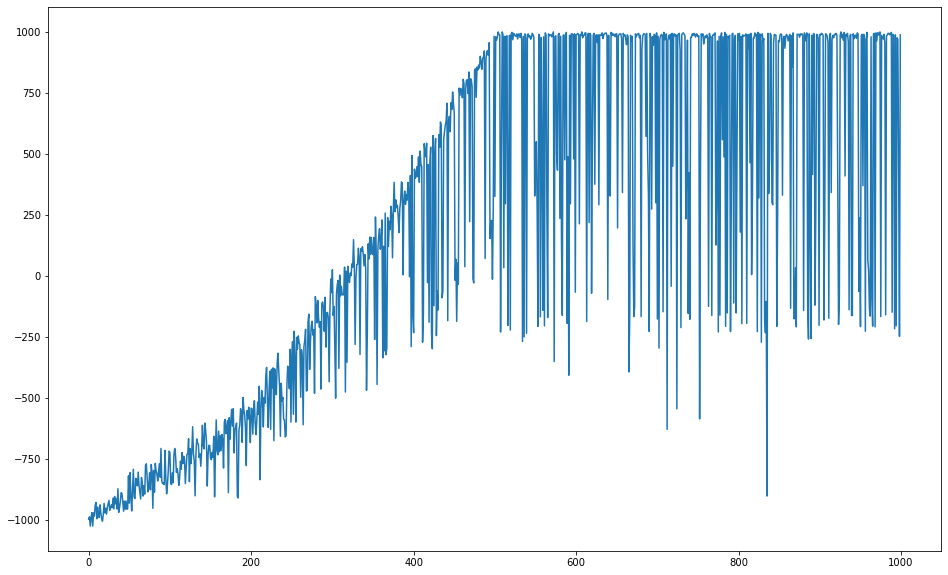

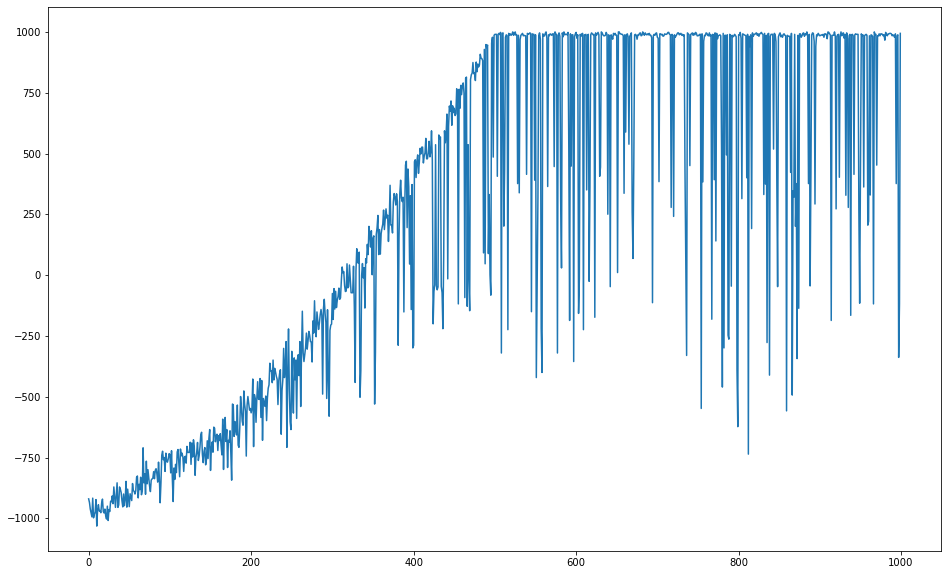

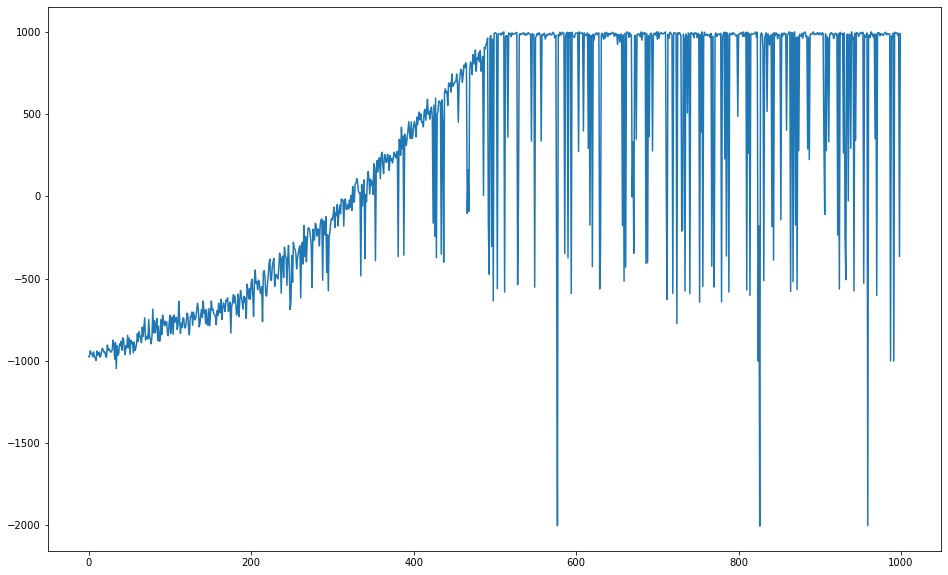

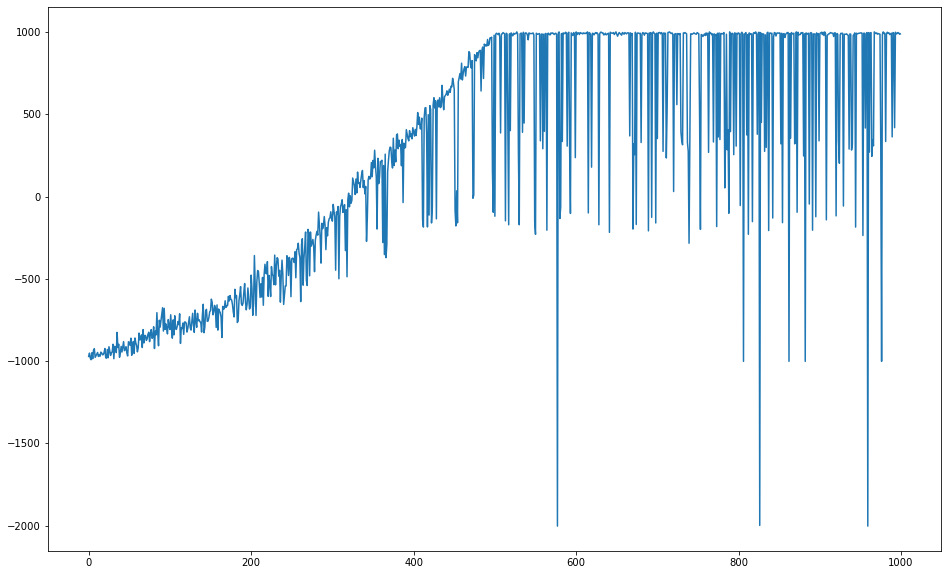

In [6]:
TRS = np.asarray(totalRewards)
for i in range(agentsNumber):
    plt.figure(figsize=(16, 10))
    plt.plot(TRS[:,i])